In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
#importing the dataset 
tit=pd.read_csv('titanic_train.csv',index_col=0)
tit.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [133]:
tit.describe

<bound method NDFrame.describe of              Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William

In [134]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [135]:
#finding the sum of missing values
tit.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [136]:
#changing the column positions
tit.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [137]:
tit=tit[['Survived', 'Name', 'Sex', 'Age','Pclass', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked']]
tit.head(2)

,Survived,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",male,22.0,3,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,1,0,PC 17599,71.2833,C85,C


In [138]:
#replacing the missing values column wise 
#age column replacing 
tit['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [139]:
tit.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\A C\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

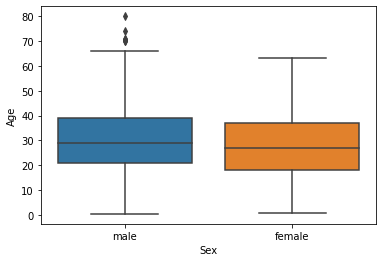

In [140]:
#visualizatin of age column using the boxplot
sns.boxplot('Sex','Age',data=tit)

C:\Users\A C\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

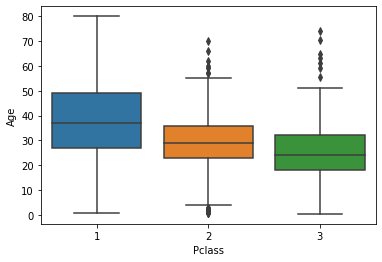

In [141]:
#using pclass instead of sex with boxplot 
sns.boxplot('Pclass','Age',data=tit)

In [142]:
#using the medians of the pclass to replace the values in the age 
tit.groupby(['Pclass'])['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [143]:
#creating function to replace missing values
def m_v(cols):
    Age=cols[0]
    Pclass=cols[1]
    if (Pclass==1):
        return 37
    elif (Pclass==2):
        return 29
    else:
        return 24
    
tit['Age']=tit[['Age','Pclass']].apply(m_v,axis=1)

In [144]:
tit.Age.isnull().sum()

0

In [145]:
#replacing the values on embarked column
tit['Embarked'].isnull().sum()

2

In [146]:
tit['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C:\Users\A C\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

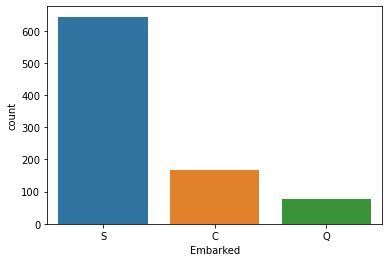

In [147]:
#visualization on embarked columns
sns.countplot('Embarked',data=tit)

In [148]:
tit['Embarked']=tit['Embarked'].fillna('S')

In [149]:
tit['Embarked'].isnull().sum()

0

In [150]:
tit.isnull().sum()

Survived      0
Name          0
Sex           0
Age           0
Pclass        0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [151]:
#missing values on cabin column
tit.Cabin.value_counts()#delete this column because no relationship in data pounts and also having huge number of missing values


G6             4
C23 C25 C27    4
B96 B98        4
E101           3
F33            3
              ..
C103           1
D6             1
C82            1
C104           1
B94            1
Name: Cabin, Length: 147, dtype: int64

In [152]:
#deleting the column cain
del tit['Cabin']

In [153]:
tit.head(2)

,Survived,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",male,24,3,1,0,A/5 21171,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,1,0,PC 17599,71.2833,C


In [154]:
#checking whether the data set is balanced or imbalanced
tit['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [155]:
#deleting the columns which will not be required for tha analysis
#here from above pasenger id,name,ticket will be not required and do not paly any role in analysis
del tit['Name']

In [156]:
del tit['Ticket']

In [157]:
tit.head()

,Survived,Sex,Age,Pclass,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,male,24,3,1,0,7.2500,S
2,1,female,37,1,1,0,71.2833,C
3,1,female,24,3,0,0,7.9250,S
4,1,female,37,1,1,0,53.1000,S
5,0,male,24,3,0,0,8.0500,S


In [158]:
#coverting categorical to numerical value 
#one hotencoding and labelencoding
#using label encoding on embarked column
from sklearn.preprocessing import LabelEncoder
l_e=LabelEncoder()

In [172]:
tit['Embarked']=l_e.fit_transform(tit['Embarked'])

In [173]:
tit.head()

,Survived,Sex,Age,Pclass,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,male,24,3,1,0,7.2500,2
2,1,female,37,1,1,0,71.2833,0
3,1,female,24,3,0,0,7.9250,2
4,1,female,37,1,1,0,53.1000,2
5,0,male,24,3,0,0,8.0500,2


In [174]:
#using onehot encoder
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [175]:
tit.head()

,Survived,Sex,Age,Pclass,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,male,24,3,1,0,7.2500,2
2,1,female,37,1,1,0,71.2833,0
3,1,female,24,3,0,0,7.9250,2
4,1,female,37,1,1,0,53.1000,2
5,0,male,24,3,0,0,8.0500,2


In [176]:
tit=pd.get_dummies(tit)

In [177]:
tit.head(2)

,Survived,Age,Pclass,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,,
1,0,24,3,1,0,7.2500,2,0,1
2,1,37,1,1,0,71.2833,0,1,0


In [178]:
tit.drop('Sex_male',axis=1,inplace=True)

In [180]:
tit.head(2)

,Survived,Age,Pclass,SibSp,Parch,Fare,Embarked,Sex_female
PassengerId,,,,,,,,
1,0,24,3,1,0,7.2500,2,0
2,1,37,1,1,0,71.2833,0,1


In [181]:
#feature selection
tit.corr()

,Survived,Age,Pclass,SibSp,Parch,Fare,Embarked,Sex_female
Survived,1.000000,0.333016,-0.338481,-0.035322,0.081629,0.257307,-0.167675,0.543351
Age,0.333016,1.000000,-0.993769,-0.077993,-0.018639,0.571282,-0.183762,0.126551
Pclass,-0.338481,-0.993769,1.000000,0.083081,0.018443,-0.549500,0.162098,-0.131900
SibSp,-0.035322,-0.077993,0.083081,1.000000,0.414838,0.159651,0.068230,0.114631
Parch,0.081629,-0.018639,0.018443,0.414838,1.000000,0.216225,0.039798,0.245489
Fare,0.257307,0.571282,-0.549500,0.159651,0.216225,1.000000,-0.224719,0.182333
Embarked,-0.167675,-0.183762,0.162098,0.068230,0.039798,-0.224719,1.000000,-0.108262
Sex_female,0.543351,0.126551,-0.131900,0.114631,0.245489,0.182333,-0.108262,1.000000


<AxesSubplot:>

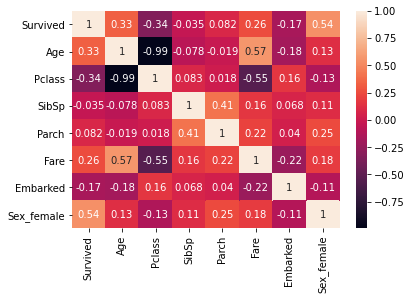

In [182]:
sns.heatmap(tit.corr(),annot=True)

In [183]:
#feature importance
x=tit.drop('Survived',axis=1)

In [184]:
tit.isnull().sum()

Survived      0
Age           0
Pclass        0
SibSp         0
Parch         0
Fare          0
Embarked      0
Sex_female    0
dtype: int64

In [185]:
y=tit['Survived']

In [186]:
from sklearn.ensemble import ExtraTreesRegressor
m=ExtraTreesRegressor()

In [187]:
m.fit(x,y)

ExtraTreesRegressor()

In [188]:
m.feature_importances_

array([0.05932989, 0.07545432, 0.04664497, 0.05709925, 0.33642764,
       0.0444028 , 0.38064112])

In [189]:
f=pd.Series(m.feature_importances_,index=x.columns)

<AxesSubplot:>

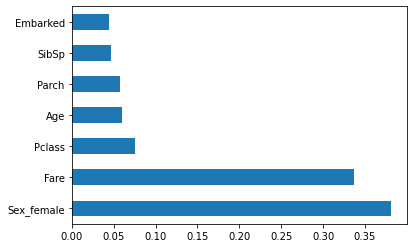

In [190]:
f.nlargest(7).plot(kind='barh')

In [195]:
#train tyest split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [200]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [201]:
x1=sc.fit_transform(x_train)

In [202]:
x2=sc.fit_transform(x_test)

In [206]:
#model building
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x1,y_train)
pred=log.predict(x2)

In [211]:
#accuracy check
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7947761194029851

In [210]:
#accuracy check
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       173
           1       0.69      0.77      0.73        95

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.80      0.79      0.80       268

